<a href="https://colab.research.google.com/github/Sanjana1306/Machine-Learning-Projects/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Liraries that are required for the Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
# Loading DataSet in Mall_data
Mall_data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
Mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
Mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Checking the dataset has Null Values or not
Mall_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Checking type
Mall_data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# Droping Not useable Columns just like ID
Mall_data1 = Mall_data.copy()
Mall_data1.drop(["CustomerID"],axis = 1, inplace = True)

In [ ]:
Mall_data1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

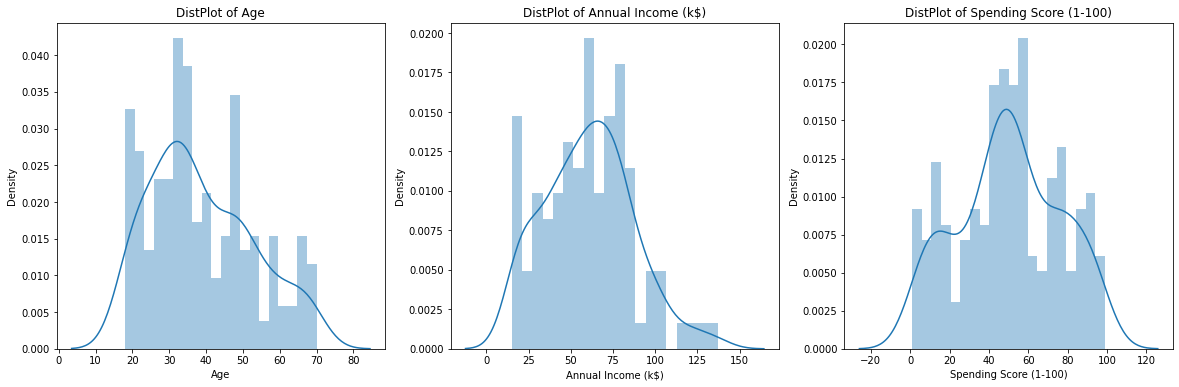

In [ ]:
# Ploting 
Columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
n = 0
plt.figure(1,figsize=(20,6))
for i in Columns:
    n+=1
    plt.subplot(1,3,n)
    sb.distplot(Mall_data1[i],bins = 20,)
    plt.title("DistPlot of {}".format(i))
              
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


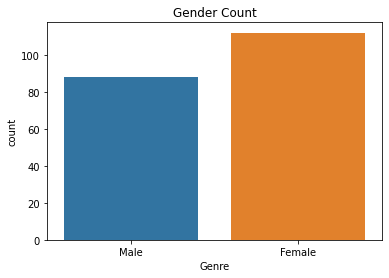

In [ ]:
sb.countplot(Mall_data['Genre'])
plt.title("Gender Count")
plt.show()

In [ ]:
df_18_25 = Mall_data1[(Mall_data1.Age>=18) & (Mall_data1.Age<=25)]  
df_26_35 = Mall_data1[(Mall_data1.Age>=26) & (Mall_data1.Age<=35)]  
df_36_45 = Mall_data1[(Mall_data1.Age>=36) & (Mall_data1.Age<=45)]  
df_46_55 = Mall_data1[(Mall_data1.Age>=46) & (Mall_data1.Age<=55)]  
df_56_above = Mall_data1[Mall_data1.Age>=56]

In [ ]:
X_part = ["18-25","26-35","36-45","46-55","55+"]
Y_part = [len(df_18_25), len(df_26_35),len(df_36_45),len(df_46_55),len(df_56_above)]

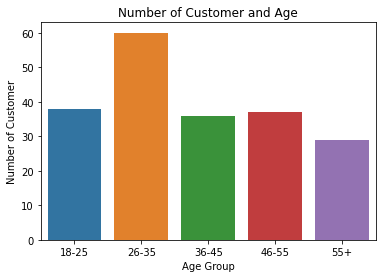

In [ ]:
sb.barplot(x = X_part,y = Y_part)
plt.xlabel("Age Group")
plt.ylabel("Number of Customer")
plt.title("Number of Customer and Age")
plt.show()

In [ ]:
ai_30 = Mall_data1[Mall_data1["Annual Income (k$)"]<=30]
ai_31_60 = Mall_data1[(Mall_data1["Annual Income (k$)"]>=31) & (Mall_data1["Annual Income (k$)"]<=60)]
ai_61_90 = Mall_data1[(Mall_data1["Annual Income (k$)"]>=61) & (Mall_data1["Annual Income (k$)"]<=90)]
ai_91_120 = Mall_data1[(Mall_data1["Annual Income (k$)"]>=91) & (Mall_data1["Annual Income (k$)"]<=120)]
ai_121_above = Mall_data1[Mall_data1["Annual Income (k$)"]>=121]

In [ ]:
x_ai = ["0-30", "31-60", "61-90", "91-120","121-above"]
y_ai = [len(ai_30), len(ai_31_60), len(ai_61_90), len(ai_91_120), len(ai_121_above)]

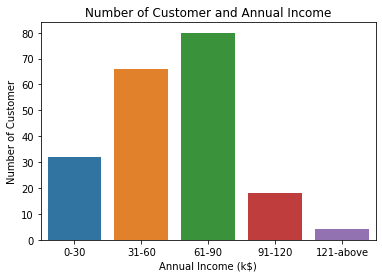

In [ ]:
sb.barplot(x = x_ai,y = y_ai)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Number of Customer")
plt.title("Number of Customer and Annual Income")
plt.show()

In [ ]:
x = Mall_data1.loc[:,["Age","Spending Score (1-100)"]].values

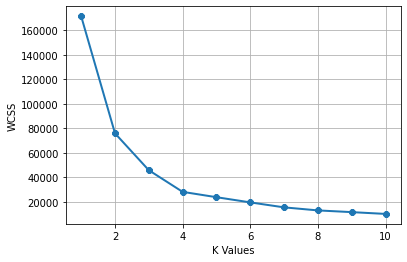

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,init = "k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1,11), wcss, marker = "8",linewidth = 2)
plt.xlabel('K Values')
plt.ylabel("WCSS")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(x)
print(label)
print(kmeans.cluster_centers_)


[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


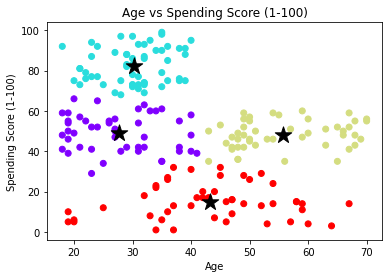

In [ ]:
plt.scatter(x[:,0],x[:,1],c = kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300,marker="*",color = 'black')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score (1-100)")
plt.show()

In [ ]:
x1 = Mall_data1.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

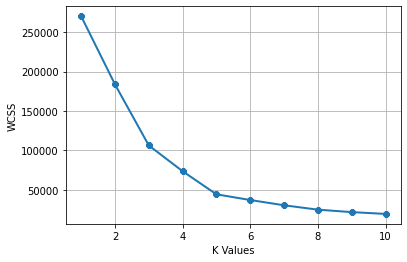

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1,11), wcss, marker = "8",linewidth = 2)
plt.xlabel('K Values')
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters = 5)
label1 = kmeans1.fit_predict(x1)
print(label1)
print(kmeans1.cluster_centers_)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]
[[55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


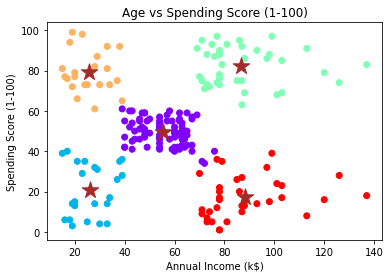

In [ ]:
plt.scatter(x1[:,0],x1[:,1],c = kmeans1.labels_,cmap = 'rainbow')
plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],s = 300,marker="*",color = 'brown')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score (1-100)")
plt.show()

In [ ]:
res = Mall_data1.copy()

In [ ]:
res['Group'] = label1